In [60]:
import pandas as pd

data = pd.read_csv('data/mnist_train.csv')
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
# Get only 5 and 6 digits
data = data[(data['label'] == 5) | (data['label'] == 6)]
data.shape

(11339, 785)

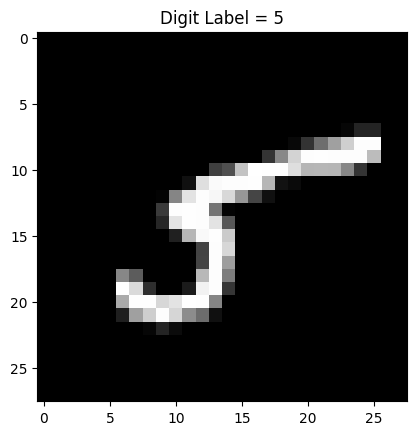

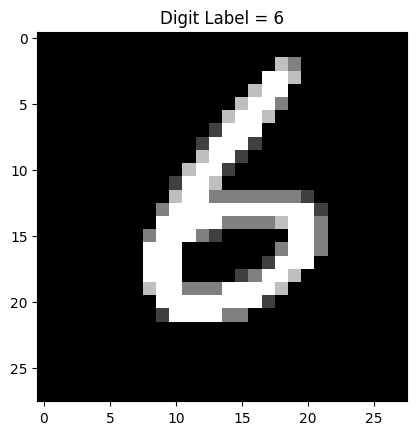

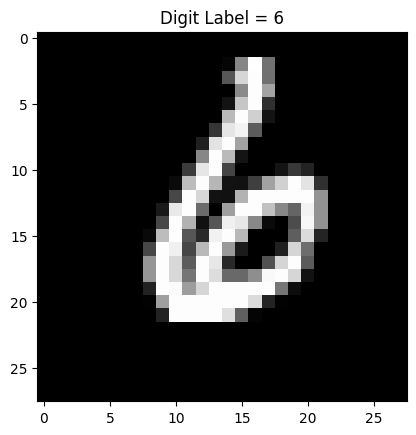

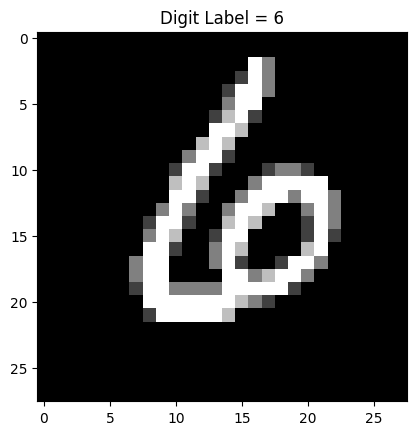

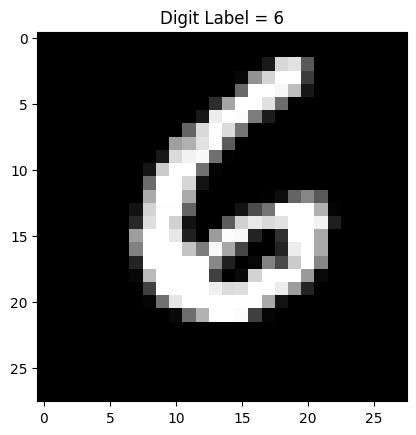

In [62]:
import matplotlib.pyplot as plt

def draw_digit(data, row_id):
    row = data.iloc[row_id]
    label = row['label']
    image = row.drop('label').values.reshape(28, 28)
    plt.title('Digit Label = {}'.format(label))
    plt.imshow(image, cmap='gray')
    plt.show()
for row_id in range(10, 15):
    draw_digit(data, row_id)

In [63]:
X = data.drop('label', axis=1)
y = data['label']
y = y.map({5: 1, 6: 0})


In [64]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

class LossFunction:

    def __init__(self, X, y):
        self.X = X
        self.y = y
    
    def loss(self, a : np.ndarray):
        prob = sigmoid(np.dot(self.X, a))
        values = - self.y * np.log(prob) - (1 - self.y) * np.log(1 - prob)
        return np.nansum(values) / self.y.shape[0]

    def gradient(self, a : np.ndarray):
        prob = sigmoid(np.dot(self.X, a))
        sub_coefficient = -(self.y - prob) 
        return np.dot(self.X.T, sub_coefficient) / self.y.shape[0]
    
    def precision(self, a : np.ndarray):
        prob = sigmoid(np.dot(self.X, a))
        prob = np.array(prob >= 0.5, dtype=np.int32)
        return np.sum(prob == self.y) / self.y.shape[0]

loss_func = LossFunction(X, y)

print(loss_func.loss(np.zeros(X.shape[1])))

0.6931471805599453


In [72]:
def gradient_descent(loss_func, starting_point, learning_rate = 0.000001, num_steps = 14, precision=0.00001):
    cur_point = starting_point
    for i in range(num_steps):
        grad = loss_func.gradient(cur_point)
        print("Iteration {}: loss = {}, precision = {}".format(i, loss_func.loss(cur_point), loss_func.precision(cur_point)))
        cur_point = cur_point - learning_rate * grad
        if np.linalg.norm(grad) < precision:
            break
    return cur_point

optimal = gradient_descent(loss_func, np.zeros(X.shape[1]))

Iteration 0: loss = 0.6931471805599452, precision = 0.4821621621621622
Iteration 1: loss = 0.6076070987909999, precision = 0.8340540540540541
Iteration 2: loss = 0.5452973042717588, precision = 0.8983783783783784
Iteration 3: loss = 0.4961547501589939, precision = 0.9135135135135135
Iteration 4: loss = 0.45660959755894315, precision = 0.9254054054054054
Iteration 5: loss = 0.424276363770958, precision = 0.9356756756756757
Iteration 6: loss = 0.3974313752406298, precision = 0.9394594594594594
Iteration 7: loss = 0.3748208449619211, precision = 0.9416216216216217
Iteration 8: loss = 0.3555258047968964, precision = 0.9427027027027027
Iteration 9: loss = 0.33886491771535154, precision = 0.9454054054054054
Iteration 10: loss = 0.3243262165717902, precision = 0.947027027027027
Iteration 11: loss = 0.3115195991120124, precision = 0.9491891891891892
Iteration 12: loss = 0.3001437085019263, precision = 0.9486486486486486
Iteration 13: loss = 0.2899626635998504, precision = 0.9491891891891892


In [73]:
data_test = pd.read_csv('data/mnist_test.csv')
data_test = data_test[(data_test['label'] == 5) | (data_test['label'] == 6)]
data_test.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
X_test = data_test.drop('label', axis=1)
y_test = data_test['label']
y_test = y_test.map({5: 1, 6: 0})
X_test.shape, y_test.shape

((1850, 784), (1850,))

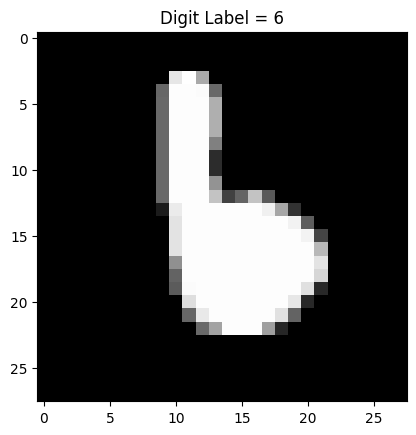

In [75]:
draw_digit(data_test, 1100)

In [76]:
test_pic = X_test.iloc[1100]
sigmoid(np.dot(test_pic, optimal))

0.22025541986897806

In [77]:
#test accuracy
loss_func = LossFunction(X_test, y_test)
print(loss_func.precision(optimal))

0.9491891891891892


- 0 hay ko phai 0
- 1 hay ko phai 1
- 2 hay ko phai 2
- 3 hay ko phai 3
...
- 9 hay ko phai 9

10 model
- model i: bao nhieu % no la so i